### 用Pandas和Seaborn进行KDE绘图可视化

https://geek-docs.com/pandas/pandas-tutorials/kde-plot-visualization-with-pandas-and-seaborn.html#google_vignette

起因是看到了一篇论文中的绘图，尝试自己实现

FedAUX: Leveraging Unlabeled Auxiliary Data in Federated Learning

![alt text](image.png)


核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。



### 首先是kde绘制一维核密度

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64
0         Iris_Setosa
1         Iris_Setosa
2         Iris_Setosa
3         Iris_Setosa
4         Iris_Setosa
            ...      
145    Iris_Virginica
146    Iris_Virginica
147    Iris_Virginica
148    Iris_Virginica
149    Iris_Virginica
Name: Target, Length: 150, dtype: object


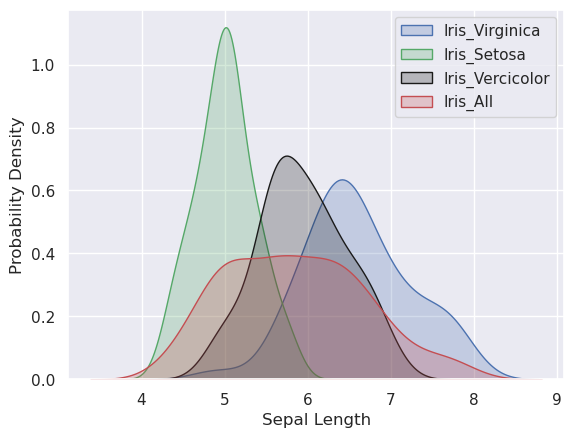

In [92]:
# importing the required libraries
from sklearn import datasets
import pandas as pd
import seaborn as sns
sns.set()           #切换到seaborn的默认运行配置
import matplotlib.pyplot as plt
%matplotlib inline
# Setting up the Data Frame
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=['Sepal_Length', 'Sepal_Width', 'Patal_Length', 'Petal_Width'])

iris_df['Target'] = iris.target
print(iris_df['Target'])
iris_df['Target'].replace([0], 'Iris_Setosa', inplace=True)
iris_df['Target'].replace([1], 'Iris_Vercicolor', inplace=True)
iris_df['Target'].replace([2], 'Iris_Virginica', inplace=True)
print(iris_df['Target'])
# Plotting the KDE Plot of Virginica
sns.kdeplot(iris_df.loc[(iris_df['Target']=='Iris_Virginica'), 'Sepal_Length'], color='b', label='Iris_Virginica', fill=True)

# Plotting the KDE Plot of Setosa
sns.kdeplot(iris_df.loc[(iris_df['Target']=='Iris_Setosa'), 'Sepal_Length'], color='g', fill=True, label='Iris_Setosa')

# Plotting the KDE Plot of Vercicolor
sns.kdeplot(iris_df.loc[(iris_df['Target']=='Iris_Vercicolor'), 'Sepal_Length'], color='k', fill=True, label='Iris_Vercicolor')

# 所有的数据中长度的分布
sns.kdeplot(iris_df.loc[iris_df.index, 'Sepal_Length'], color='r', label='Iris_All', fill=True)

# Setting the X and Y Label
plt.xlabel('Sepal Length')
plt.ylabel('Probability Density')
plt.legend()


In [37]:
iris_df['Target']

0         Iris_Setosa
1         Iris_Setosa
2         Iris_Setosa
3         Iris_Setosa
4         Iris_Setosa
            ...      
145    Iris_Virginica
146    Iris_Virginica
147    Iris_Virginica
148    Iris_Virginica
149    Iris_Virginica
Name: Target, Length: 150, dtype: object

### 尝试展示二维数据，但是两个范围的交界处无法达到很好的渐变融合，不相容，且叠加

/tmp/ipykernel_1165211/301332386.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(iris_virginica['Sepal_Length'], iris_virginica['Sepal_Width'], c='darkblue', s=20, marker='x', edgecolor='black')


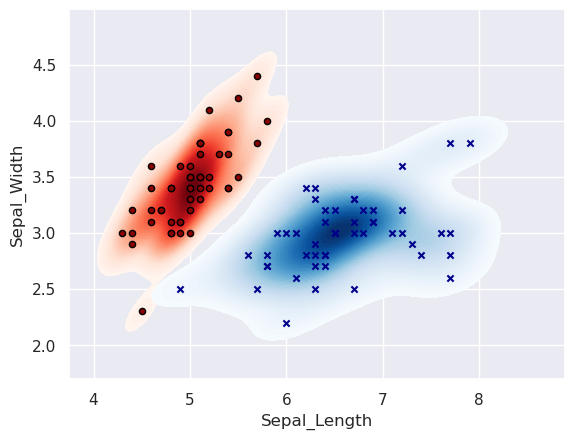

In [107]:
# Setting up the samples
iris_setosa = iris_df.query("Target=='Iris_Setosa'")
iris_virginica = iris_df.query("Target=='Iris_Virginica'")
# Plotting the KDE Plot
sns.kdeplot(x=iris_setosa['Sepal_Length'],
            y=iris_setosa['Sepal_Width'],
            color='b', fill=True, label='Iris_Setosa',
            cmap="Reds", thresh=0.05, levels=50, common_grid=True, weights=1)
  
sns.kdeplot(x=iris_virginica['Sepal_Length'], 
            y=iris_virginica['Sepal_Width'], color='r',
            fill=True, label='Iris_Virginica',
            cmap="Blues", thresh=0.05, levels=50, common_grid=True, weights=2)

# 参考本文件最后的部分https://zhuanlan.zhihu.com/p/573024706
# from scipy.stats import gaussian_kde
# import numpy as np
# Calculate the point density
# xy = np.vstack([iris_virginica['Sepal_Length'], iris_virginica['Sepal_Width']])  #  将两个维度的数据叠加
# z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度

plt.scatter(iris_virginica['Sepal_Length'], iris_virginica['Sepal_Width'], c='darkblue', s=20, marker='x', edgecolor='black')
# 使用散点图表示出密度变化
# plt.scatter(iris_virginica['Sepal_Length'], iris_virginica['Sepal_Width'], c=z, s=20)

# xy2 = np.vstack([iris_setosa['Sepal_Length'], iris_setosa['Sepal_Width']])  #  将两个维度的数据叠加
# z2 = gaussian_kde(xy2)(xy2)  # 建立概率密度分布，并计算每个样本点的概率密度

plt.scatter(iris_setosa['Sepal_Length'], iris_setosa['Sepal_Width'], c='darkred', s=20, marker='o', edgecolor='black')
# plt.scatter(iris_setosa['Sepal_Length'], iris_setosa['Sepal_Width'], c=z2, s=20, )
# plt.colorbar()

#### 如下，效果不好，像两个荷包蛋

<Axes: >

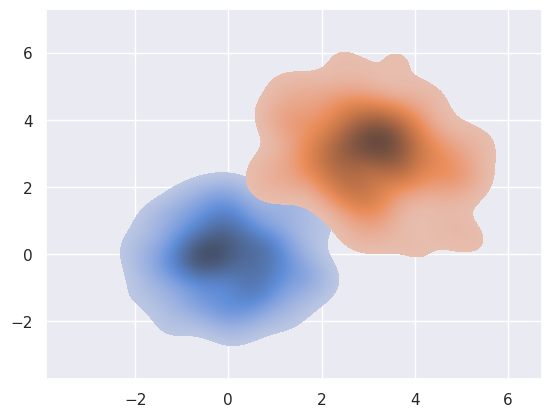

In [25]:
import numpy as np
x=np.random.randn(100)  #随机生成100个符合正态分布的数
y=np.random.randn(100)
x1=np.random.randn(100)+3  #随机生成100个符合正态分布的数
y1=np.random.randn(100)+3 
sns.kdeplot(x=x,y=y,fill=True, levels=500)
sns.kdeplot(x=x1,y=y1,fill=True, levels=500)

### 参考博客，借助ChatGPT实现

[Python中使用knn绘制聚类的决策边界](https://zhuanlan.zhihu.com/p/582307338)

score set 0.9533333333333334


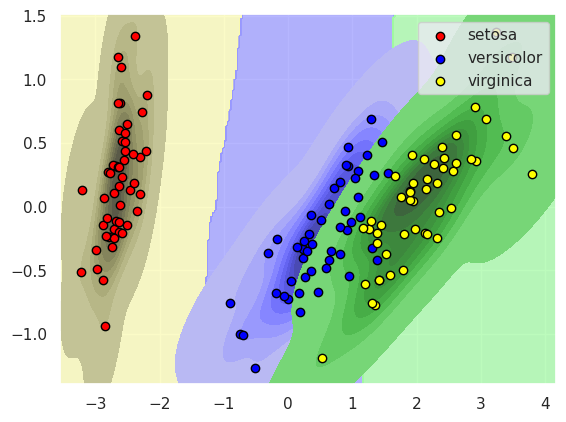

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#导入iris数据
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier 


def plot_decision_boundary(dataset, label, method, k):
    #输入数据集，标签，降维方法，和k；k的大小决定边界的光滑程度

    y = label

    #选择降维方法
    if method == PCA: 
        X = PCA(n_components=2).fit_transform(dataset)
    if method == TSNE: 
        X = TSNE(n_components=2, random_state=0, n_iter=20000).fit_transform(dataset)

    knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto')
    knn.fit(X, y)
    y_pred = knn.predict(X)
    # print(y_pred)
    print("score set", accuracy_score(label, y_pred))

    #绘制区域边界 乘1.1防止漏掉点
    axes=[min(X[:,0])*1.1, max(X[:,0])*1.1, min(X[:,1])*1.1, max(X[:,1])*1.1]
    
    #均匀300个横坐标
    xp=np.linspace(axes[0], axes[1], 300) 
    #均匀300个纵坐标
    yp=np.linspace(axes[2], axes[3], 300) 
    #生成300x300个点
    x1, y1=np.meshgrid(xp, yp)

    #按行拼接，规范成坐标点的格式
    xy=np.c_[x1.ravel(), y1.ravel()]
    # print(xy)
    #训练之后平铺
    y_pred = knn.predict(xy).reshape(x1.shape)

    #绘制底面颜色
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, y1, y_pred, alpha=0.7, cmap=custom_cmap, levels=50)
    sns.kdeplot(x=X[y==0,0], 
            y=X[y==0, 1], color='#fafab0',
            fill=True, thresh=0.001)
    sns.kdeplot(x=X[y==1,0], 
            y=X[y==1, 1], color='#9898ff',
            fill=True, thresh=0.001)
    sns.kdeplot(x=X[y==2,0], 
            y=X[y==2, 1], color='#a0faa0',
            fill=True, thresh=0.001)

    #绘制点
    p1=plt.scatter(X[y==0,0], X[y==0, 1], c='red', marker = 'o', linewidths = 1, edgecolors ='black')
    p2=plt.scatter(X[y==1,0], X[y==1, 1], c='blue', marker = 'o', linewidths = 1, edgecolors ='black')
    p3=plt.scatter(X[y==2,0], X[y==2, 1], c='yellow', marker = 'o', linewidths = 1, edgecolors ='black')
    #设置注释
    plt.legend([p1, p2, p3], iris['target_names'], loc='upper right')
    plt.xlim((axes[0], axes[1]))
    plt.ylim((axes[2], axes[3]))
    plt.show()



iris = load_iris()
X=iris.data
y=iris.target

# 可以更改PCA/TSNE和邻居数量
plot_decision_boundary(X,y,PCA,20)

### 参考论文中所述Panels 1–3: Predictions made by linear classifiers，将KNN修改为线性分类器

#### 1. 先不降维，一层分类器

torch.Size([150, 4])
Epoch [100/1000], Loss: 0.7201
Epoch [200/1000], Loss: 0.6066
Epoch [300/1000], Loss: 0.5445
Epoch [400/1000], Loss: 0.5026
Epoch [500/1000], Loss: 0.4707
Epoch [600/1000], Loss: 0.4449
Epoch [700/1000], Loss: 0.4231
Epoch [800/1000], Loss: 0.4042
Epoch [900/1000], Loss: 0.3875
Epoch [1000/1000], Loss: 0.3725
Accuracy score: 0.9666666666666667


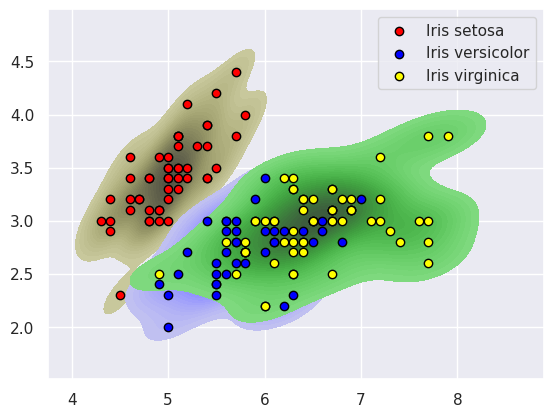

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
#导入iris数据
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap

def plot_decision_boundary(dataset, label):
    #输入数据集，标签，降维方法，和k；k的大小决定边界的光滑程度

    y = label
    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X).float()
    data_tensor = torch.tensor(dataset).float()
    y_tensor = torch.tensor(y)
    print(X_tensor.shape)


    # 定义线性分类器模型
    class LinearClassifier(nn.Module):
        def __init__(self, input_size, num_classes):
            super(LinearClassifier, self).__init__()
            self.linear = nn.Linear(input_size, num_classes)

        def forward(self, x):
            out = self.linear(x)
            return out

    # 创建线性分类器模型实例
    model = LinearClassifier(input_size=4, num_classes=3)

    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # 训练模型
    num_epochs = 1000
    for epoch in range(num_epochs):
        # 前向传播
        outputs = model(data_tensor)
        loss = criterion(outputs, y_tensor)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    # 使用训练后的模型进行预测
    with torch.no_grad():
        outputs = model(data_tensor)
        _, predicted = torch.max(outputs.data, 1)

    print("Accuracy score:", accuracy_score(y, predicted.numpy()))

    
    sns.kdeplot(x=X[y==0,0], 
            y=X[y==0, 1], color='#fafab0',
            fill=True, levels=30)
    sns.kdeplot(x=X[y==1,0], 
            y=X[y==1, 1], color='#9898ff',
            fill=True, levels=30)
    sns.kdeplot(x=X[y==2,0], 
            y=X[y==2, 1], color='#a0faa0',
            fill=True, levels=30)

    # 绘制点
    p1=plt.scatter(X[y==0,0], X[y==0, 1], c='red', marker = 'o', linewidths = 1, edgecolors ='black')
    p2=plt.scatter(X[y==1,0], X[y==1, 1], c='blue', marker = 'o', linewidths = 1, edgecolors ='black')
    p3=plt.scatter(X[y==2,0], X[y==2, 1], c='yellow', marker = 'o', linewidths = 1, edgecolors ='black')

    # 设置注释
    plt.legend([p1, p2, p3], ["Iris setosa", "Iris versicolor", "Iris virginica"], loc='upper right')

    plt.show()

iris = load_iris()
X = iris.data

y = iris.target

plot_decision_boundary(X, y)


#### 2. 降维先，使用sns.kdeplot和plt.contourf绘制高斯核密度和等高线

torch.Size([150, 2])
Epoch [100/1000], Loss: 0.5462
Epoch [200/1000], Loss: 0.4189
Epoch [300/1000], Loss: 0.3493
Epoch [400/1000], Loss: 0.3018
Epoch [500/1000], Loss: 0.2667
Epoch [600/1000], Loss: 0.2394
Epoch [700/1000], Loss: 0.2177
Epoch [800/1000], Loss: 0.2002
Epoch [900/1000], Loss: 0.1856
Epoch [1000/1000], Loss: 0.1734
Accuracy score: 0.96
tensor([0, 0, 0,  ..., 2, 2, 2])
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


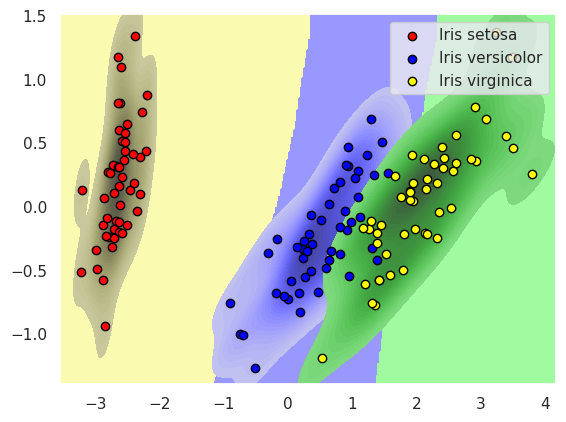

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
#导入iris数据
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap

def plot_decision_boundary(dataset, label, method, k):
    #输入数据集，标签，降维方法，和k；k的大小决定边界的光滑程度

    y = label

    #选择降维方法
    if method == PCA: 
        X = PCA(n_components=2).fit_transform(dataset)
    if method == TSNE: 
        X = TSNE(n_components=2,random_state=0, n_iter=20000).fit_transform(dataset)

    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X).float()
    y_tensor = torch.tensor(y)
    print(X_tensor.shape)


    # 定义线性分类器模型
    class LinearClassifier(nn.Module):
        def __init__(self, input_size, num_classes):
            super(LinearClassifier, self).__init__()
            self.linear1 = nn.Linear(input_size, 32)
            self.linear2 = nn.Linear(32, num_classes)

        def forward(self, x):
            out = self.linear1(x)
            out = F.relu(out)
            out = self.linear2(out)
            return out

    # 创建线性分类器模型实例
    model = LinearClassifier(input_size=2, num_classes=3)

    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # 训练模型
    num_epochs = 1000
    for epoch in range(num_epochs):
        # 前向传播
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    # 使用训练后的模型进行预测
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs.data, 1)

    print("Accuracy score:", accuracy_score(y, predicted.numpy()))

    # 绘制决策边界
    axes=[X[:,0].min()*1.1, X[:,0].max()*1.1, X[:,1].min()*1.1, X[:,1].max()*1.1]
    xp = np.linspace(axes[0], axes[1], 300) 
    yp = np.linspace(axes[2], axes[3], 300) 
    x1, y1 = np.meshgrid(xp, yp)
    xy = np.c_[x1.ravel(), y1.ravel()]
    outputs = model(torch.tensor(xy).float())
    
    value, predicted = torch.max(outputs.data, 1)
    print(predicted)
    y_pred = predicted.numpy().reshape(x1.shape)
    print(y_pred)
    #绘制底面颜色
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    from scipy.ndimage import gaussian_filter
    blurred_y_pred = gaussian_filter(y_pred, sigma=5)
    plt.contourf(x1, y1, blurred_y_pred, alpha=1, cmap=custom_cmap, levels=30)

    sns.kdeplot(x=X[y==0,0], 
            y=X[y==0, 1], color='#fafab0',
            fill=True, levels=30)
    sns.kdeplot(x=X[y==1,0], 
            y=X[y==1, 1], color='#9898ff',
            fill=True, levels=30)
    sns.kdeplot(x=X[y==2,0], 
            y=X[y==2, 1], color='#a0faa0',
            fill=True, levels=30)

    # 绘制点
    p1=plt.scatter(X[y==0,0], X[y==0, 1], c='red', marker = 'o', linewidths = 1, edgecolors ='black')
    p2=plt.scatter(X[y==1,0], X[y==1, 1], c='blue', marker = 'o', linewidths = 1, edgecolors ='black')
    p3=plt.scatter(X[y==2,0], X[y==2, 1], c='yellow', marker = 'o', linewidths = 1, edgecolors ='black')

    # 设置注释
    plt.legend([p1, p2, p3], ["Iris setosa", "Iris versicolor", "Iris virginica"], loc='upper right')
    plt.xlim((axes[0], axes[1]))
    plt.ylim((axes[2], axes[3]))
    plt.show()

iris = load_iris()
X = iris.data

y = iris.target

plot_decision_boundary(X, y, PCA, 5)


#### 3. 降维先，只使用plt.contourf绘制等高线

torch.Size([150, 2])
Epoch [100/1000], Loss: 0.5008
Epoch [200/1000], Loss: 0.3941
Epoch [300/1000], Loss: 0.3381
Epoch [400/1000], Loss: 0.3019
Epoch [500/1000], Loss: 0.2760
Epoch [600/1000], Loss: 0.2562
Epoch [700/1000], Loss: 0.2400
Epoch [800/1000], Loss: 0.2263
Epoch [900/1000], Loss: 0.2145
Epoch [1000/1000], Loss: 0.2039
Accuracy score: 0.9333333333333333
tensor([3.7927, 3.7535, 3.7144,  ..., 5.6811, 5.7224, 5.7637])
[[3.7926793 3.7535446 3.71441   ... 5.7907476 5.831157  5.871567 ]
 [3.8017666 3.7626321 3.7234972 ... 5.7902184 5.8306284 5.8710384]
 [3.8108542 3.7717192 3.7325847 ... 5.789691  5.8301    5.87051  ]
 ...
 [6.056394  6.0171704 5.9779468 ... 5.683563  5.724496  5.764984 ]
 [6.061463  6.022239  5.9830155 ... 5.6823454 5.7236447 5.764372 ]
 [6.0665317 6.0273075 5.9880843 ... 5.6811275 5.7224274 5.763727 ]]


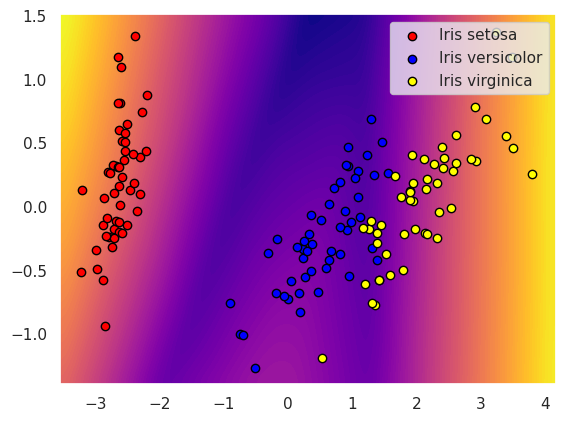

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
#导入iris数据
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib.colors import ListedColormap

def plot_decision_boundary(dataset, label, method, k):
    #输入数据集，标签，降维方法，和k；k的大小决定边界的光滑程度

    y = label

    #选择降维方法
    if method == PCA: 
        X = PCA(n_components=2).fit_transform(dataset)
    if method == TSNE: 
        X = TSNE(n_components=2,random_state=0, n_iter=20000).fit_transform(dataset)

    # 转换为 PyTorch 张量
    X_tensor = torch.tensor(X).float()
    y_tensor = torch.tensor(y)
    print(X_tensor.shape)


    # 定义线性分类器模型
    class LinearClassifier(nn.Module):
        def __init__(self, input_size, num_classes):
            super(LinearClassifier, self).__init__()
            self.linear1 = nn.Linear(input_size, 32)
            self.linear2 = nn.Linear(32, num_classes)

        def forward(self, x):
            out = self.linear1(x)
            out = F.relu(out)
            out = self.linear2(out)
            return out

    # 创建线性分类器模型实例
    model = LinearClassifier(input_size=2, num_classes=3)

    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # 训练模型
    num_epochs = 1000
    for epoch in range(num_epochs):
        # 前向传播
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    # 使用训练后的模型进行预测
    with torch.no_grad():
        outputs = model(X_tensor)
        _, predicted = torch.max(outputs.data, 1)

    print("Accuracy score:", accuracy_score(y, predicted.numpy()))

    # 绘制决策边界
    axes=[X[:,0].min()*1.1, X[:,0].max()*1.1, X[:,1].min()*1.1, X[:,1].max()*1.1]
    xp = np.linspace(axes[0], axes[1], 300) 
    yp = np.linspace(axes[2], axes[3], 300) 
    x1, y1 = np.meshgrid(xp, yp)
    xy = np.c_[x1.ravel(), y1.ravel()]
    outputs = model(torch.tensor(xy).float())
    
    value, predicted = torch.max(outputs.data, 1)
    print(value)
    y_pred = value.numpy().reshape(x1.shape)
    print(y_pred)

    from scipy.ndimage import gaussian_filter
    blurred_y_pred = gaussian_filter(y_pred, sigma=5)
    plt.contourf(x1, y1, blurred_y_pred, alpha=1, cmap='plasma', levels=100)

    # 绘制点
    p1=plt.scatter(X[y==0,0], X[y==0, 1], c='red', marker = 'o', linewidths = 1, edgecolors ='black')
    p2=plt.scatter(X[y==1,0], X[y==1, 1], c='blue', marker = 'o', linewidths = 1, edgecolors ='black')
    p3=plt.scatter(X[y==2,0], X[y==2, 1], c='yellow', marker = 'o', linewidths = 1, edgecolors ='black')

    # 设置注释
    plt.legend([p1, p2, p3], ["Iris setosa", "Iris versicolor", "Iris virginica"], loc='upper right')
    plt.xlim((axes[0], axes[1]))
    plt.ylim((axes[2], axes[3]))
    plt.show()

iris = load_iris()
X = iris.data

y = iris.target

plot_decision_boundary(X, y, PCA, 5)


#### cmap有几种

- 'viridis'：从黄色到绿色再到蓝色的顺序变化，被广泛认为是一种较好的感知色彩映射方案。
- 'plasma'：一种从品红到黄色再到蓝色的顺序变化，色彩过渡较为平滑。
- 'inferno'：一种从黄色到红色再到黑色的顺序变化，色彩过渡较为明显。
- 'magma'：一种从品红到黑色再到蓝色的顺序变化，色彩过渡较为柔和。
- 'cividis'：一种色盲友好的色彩映射方案，色彩过渡较为平缓。

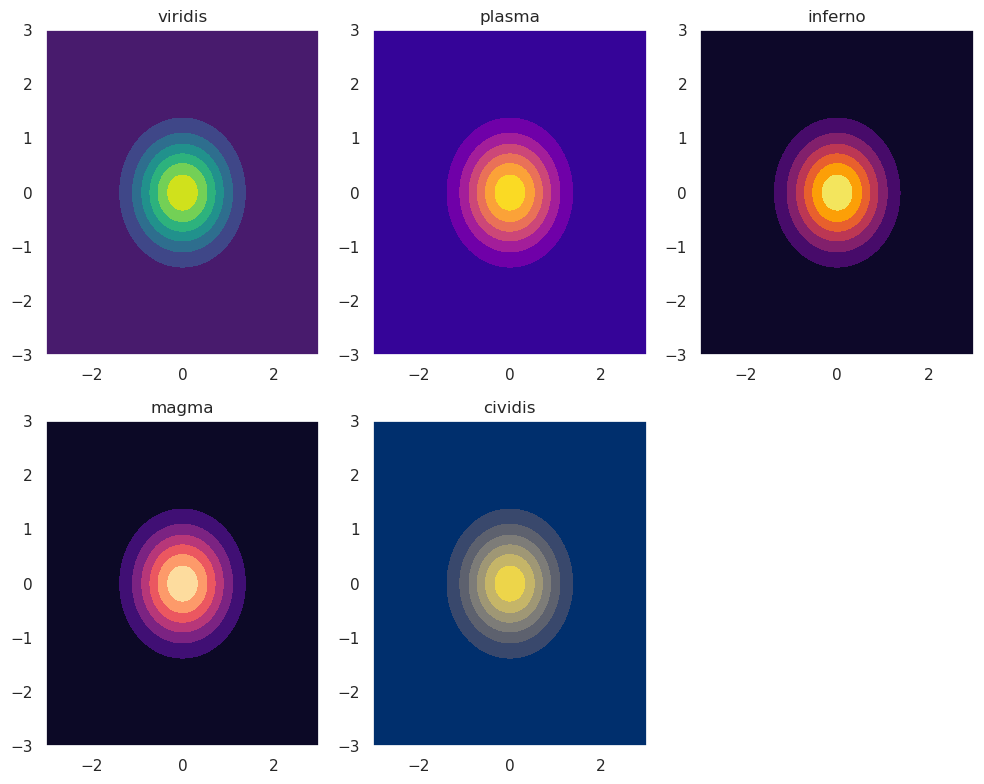

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

# 绘制等高线图，并使用不同的色彩映射方案
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.contourf(X, Y, Z, cmap='viridis')
plt.title('viridis')

plt.subplot(2, 3, 2)
plt.contourf(X, Y, Z, cmap='plasma')
plt.title('plasma')

plt.subplot(2, 3, 3)
plt.contourf(X, Y, Z, cmap='inferno')
plt.title('inferno')

plt.subplot(2, 3, 4)
plt.contourf(X, Y, Z, cmap='magma')
plt.title('magma')

plt.subplot(2, 3, 5)
plt.contourf(X, Y, Z, cmap='cividis')
plt.title('cividis')

plt.tight_layout()
plt.show()


### 增加边界高斯模糊？？失败

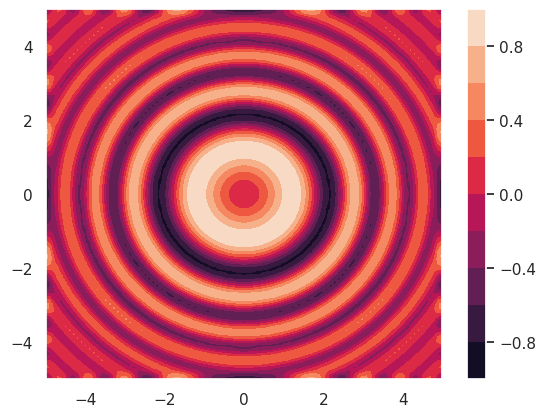

array([[-0.26237485, -0.95372198, -0.78128403, ..., -0.78128403,
        -0.95372198, -0.26237485],
       [-0.95372198, -0.76838527,  0.10299466, ...,  0.10299466,
        -0.76838527, -0.95372198],
       [-0.78128403,  0.10299466,  0.88321288, ...,  0.88321288,
         0.10299466, -0.78128403],
       ...,
       [-0.78128403,  0.10299466,  0.88321288, ...,  0.88321288,
         0.10299466, -0.78128403],
       [-0.95372198, -0.76838527,  0.10299466, ...,  0.10299466,
        -0.76838527, -0.95372198],
       [-0.26237485, -0.95372198, -0.78128403, ..., -0.78128403,
        -0.95372198, -0.26237485]])

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 生成一个示例的预测边界图像（假设这是你的预测结果）
# 这里只是一个示例，实际情况下你需要根据你的数据生成预测结果
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x1, x2)
Z = np.sin(x1**2 + x2**2)

# 对预测边界图像进行高斯模糊处理
blurred_Z = cv2.GaussianBlur(Z, (5, 5), 5)

# 绘制模糊处理后的等高线图
plt.contourf(x1, x2, blurred_Z, levels=10)
plt.colorbar()
plt.show()

Z


#### 将绘制的画布高斯模糊后作为背景？失败

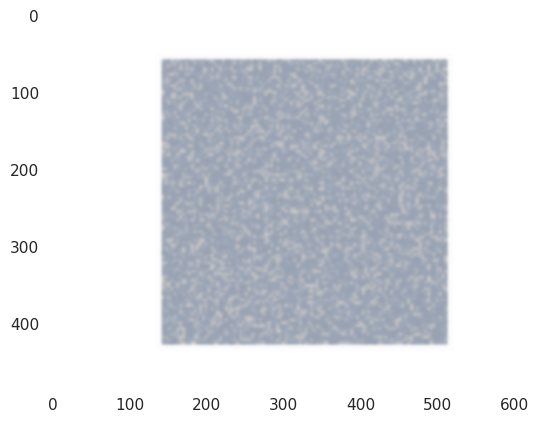

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 创建一个示例的二维数组作为面板数据
data = np.random.rand(100, 100)

# 绘制面板
plt.imshow(data, cmap='viridis')

# 设置不显示网格和坐标轴刻度
plt.grid(False)
plt.axis('off')

# 将绘制完成的面板转换为图像
plt.gcf().canvas.draw()
face = np.array(plt.gcf().canvas.renderer.buffer_rgba())

# 对图像进行高斯模糊处理
blurred_face = gaussian_filter(face, sigma=2)

# 显示处理后的图像
plt.imshow(blurred_face)
plt.axis('on')

# 显示图形
plt.show()


#### 失败

AxesImage(size=(10, 10))
(480, 640, 4)
(480, 640, 4)


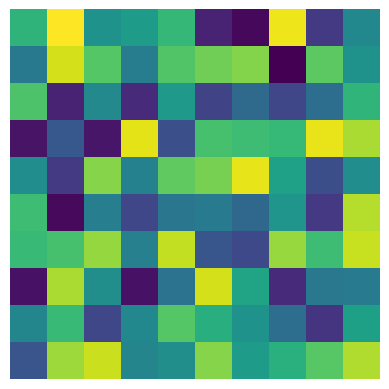

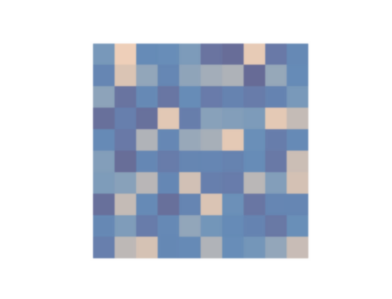

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 创建一个示例的二维数组作为面板数据
data = np.random.rand(10, 10)
# 设置不显示网格和坐标轴刻度
plt.grid(False)
plt.axis('off')
# 将绘制完成的面板转换为图像
a = plt.imshow(data, cmap='viridis')
print(a)

# 将绘制完成的面板转换为图像
plt.gcf().canvas.draw()
face = np.array(plt.gcf().canvas.renderer.buffer_rgba())
print(face.shape)
# 对图像进行高斯模糊处理
blurred_face = gaussian_filter(face, sigma=1)
print(blurred_face.shape)

# 创建一个新的画布，并设置绘图区域的大小为与图像大小相同
plt.figure(figsize=(4.8, 4.8), dpi=100)

# 将处理后的图像绘制到新的绘图区域中
plt.imshow(blurred_face)
# 设置不显示网格和坐标轴刻度
plt.grid(False)
plt.axis('off')
# 显示图形
plt.show()


#### 失败

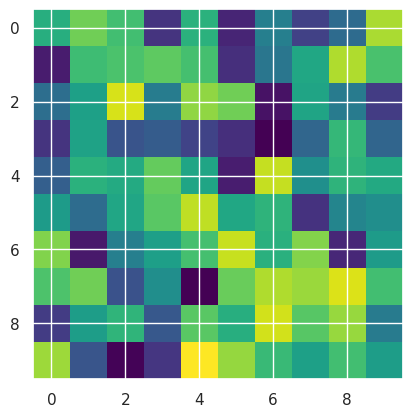

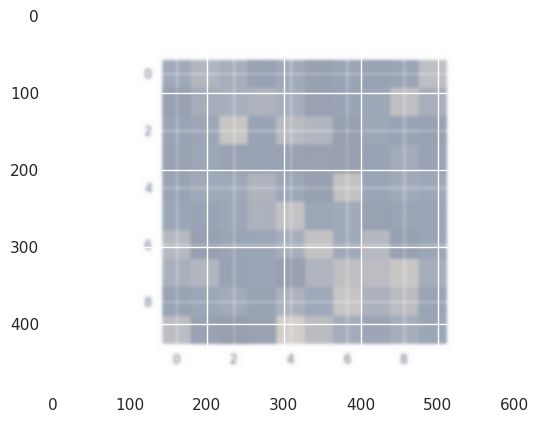

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 创建一个示例的二维数组作为面板数据
data = np.random.rand(10, 10)

# 将绘制完成的面板转换为图像
plt.imshow(data, cmap='viridis')

# 将绘制完成的面板转换为图像
plt.gcf().canvas.draw()
face = np.array(plt.gcf().canvas.renderer.buffer_rgba())

# 对图像进行高斯模糊处理
blurred_face = gaussian_filter(face, sigma=2)

# 创建一个新的画布，并设置绘图区域的大小为与图像大小相同
fig, ax = plt.subplots()

# 将处理后的图像绘制到新的绘图区域中
ax.imshow(blurred_face)
# 显示图形
plt.show()


### matplotlib绘制散点密度图

散点密度主要是计算样本点的出现次数，即密度。

高斯核密度如何实现？

[从零开始实现核密度估计（kernel density estimation，KDE）-python实现](https://blog.csdn.net/lrs1353281004/article/details/106535592)

0.1344287424354853 0.5982375333840083
-2.8235354619582567 -10.4123994811733


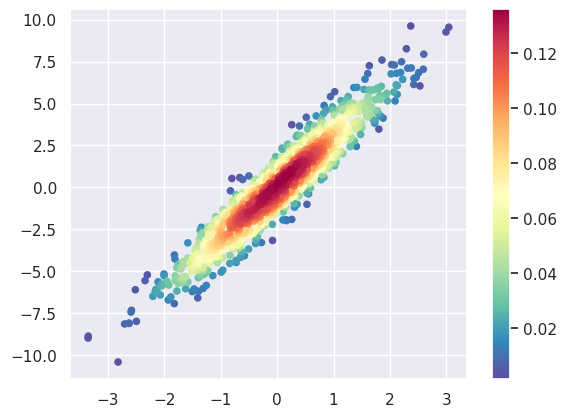

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
N=1000
x = np.random.normal(size=N)
y = x * 3 + np.random.normal(size=N)

# Calculate the point density
xy = np.vstack([x,y])  #  将两个维度的数据叠加
z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
# 最大密度
print(x[999], y[999])
# 最小密度
print(x[0], y[0])


fig, ax = plt.subplots()
plt.scatter(x, y, c=z, s=20, cmap='Spectral_r') # c表示标记的颜色
plt.colorbar()
plt.show()


#### seaborn绘制散点密度图

<Axes: >

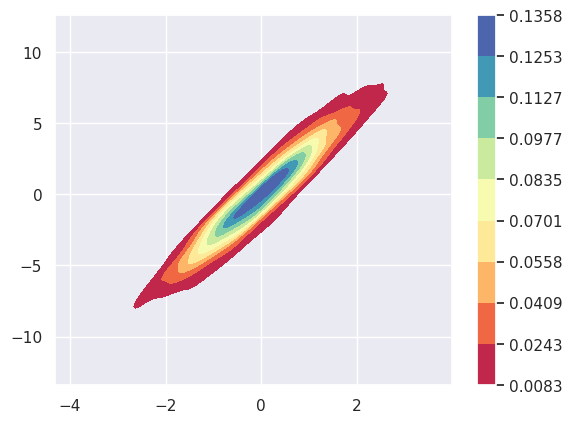

In [91]:
import seaborn as sns
sns.kdeplot(x=x, y=y, fill=True, cmap='Spectral', cbar=True)